In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from sodapy import Socrata

In [50]:
# Read csv file
la_crime_data = pd.read_csv("../Resources/Crime_Data_from_2010_to_Present.csv")


In [72]:
# Check data frame and columns for LA Crime Data
la_crime_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,LocationFormatted,LAT,LNG
0,151521112,11/04/2015,11/03/2015,2230,NaN,N Hollywood,1555,330,BURGLARY FROM VEHICLE,0344,...,330.0,NaN,NaN,NaN,11100 CAMARILLO ST,NaN,"(34.1577, -118.3727)","34.1577, -118.3727",34.1577,-118.3727
1,151521113,11/04/2015,10/30/2015,200,NaN,N Hollywood,1548,330,BURGLARY FROM VEHICLE,0344 1609 1307,...,330.0,NaN,NaN,NaN,11100 CHANDLER BL,NaN,"(34.1681, -118.3724)","34.1681, -118.3724",34.1681,-118.3724
2,151521117,11/04/2015,11/04/2015,1400,NaN,N Hollywood,1506,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421,...,930.0,NaN,NaN,NaN,7300 BAKMAN AV,NaN,"(34.203, -118.3779)","34.203, -118.3779",34.203,-118.3779
3,151521121,11/04/2015,04/28/2015,2125,NaN,N Hollywood,1567,121,"RAPE, FORCIBLE",2000 0429 1241 0416 0400 0527 1813 2002,...,121.0,NaN,NaN,NaN,10700 LANDALE ST,NaN,"(34.1513, -118.3642)","34.1513, -118.3642",34.1513,-118.3642
4,151521123,11/05/2015,10/27/2015,600,NaN,N Hollywood,1515,354,THEFT OF IDENTITY,0100 1822,...,354.0,NaN,NaN,NaN,11700 LEMAY ST,NaN,"(34.1912, -118.3891)","34.1912, -118.3891",34.1912,-118.3891


In [52]:
# Display Column Names
list(la_crime_data)

['DR Number',
 'Date Reported',
 'Date Occurred',
 'Time Occurred',
 'Area ID',
 'Area Name',
 'Reporting District',
 'Crime Code',
 'Crime Code Description',
 'MO Codes',
 'Victim Age',
 'Victim Sex',
 'Victim Descent',
 'Premise Code',
 'Premise Description',
 'Weapon Used Code',
 'Weapon Description',
 'Status Code',
 'Status Description',
 'Crime Code 1',
 'Crime Code 2',
 'Crime Code 3',
 'Crime Code 4',
 'Address',
 'Cross Street',
 'Location ']

In [71]:
# Number of records 
len(la_crime_data)

1931442

In [55]:
# Adding LocationFormatted to get Latitude and Longitude
la_crime_data["LocationFormatted"] = la_crime_data["Location "].str.strip("()")

In [84]:
#Create Latitude and Longtitude columns
#la_crime_data.drop("LAT", axis=1, inplace=True)
#la_crime_data.drop("LNG", axis=1, inplace=True)
la_crime_data["LAT"] = la_crime_data["LocationFormatted"].str.split(",", n = 1, expand =True)[0]
la_crime_data["LNG"] = la_crime_data["LocationFormatted"].str.split(",", n = 1, expand =True)[1]

la_crime_data["LAT"] = pd.to_numeric(la_crime_data["LAT"],errors='coerce')
la_crime_data["LNG"] = pd.to_numeric(la_crime_data["LNG"],errors='coerce')
la_crime_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,LocationFormatted,LAT,LNG
0,151521112,11/04/2015,11/03/2015,2230,NaN,N Hollywood,1555,330,BURGLARY FROM VEHICLE,0344,...,330.0,NaN,NaN,NaN,11100 CAMARILLO ST,NaN,"(34.1577, -118.3727)","34.1577, -118.3727",34.1577,-118.3727
1,151521113,11/04/2015,10/30/2015,200,NaN,N Hollywood,1548,330,BURGLARY FROM VEHICLE,0344 1609 1307,...,330.0,NaN,NaN,NaN,11100 CHANDLER BL,NaN,"(34.1681, -118.3724)","34.1681, -118.3724",34.1681,-118.3724
2,151521117,11/04/2015,11/04/2015,1400,NaN,N Hollywood,1506,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421,...,930.0,NaN,NaN,NaN,7300 BAKMAN AV,NaN,"(34.203, -118.3779)","34.203, -118.3779",34.2030,-118.3779
3,151521121,11/04/2015,04/28/2015,2125,NaN,N Hollywood,1567,121,"RAPE, FORCIBLE",2000 0429 1241 0416 0400 0527 1813 2002,...,121.0,NaN,NaN,NaN,10700 LANDALE ST,NaN,"(34.1513, -118.3642)","34.1513, -118.3642",34.1513,-118.3642
4,151521123,11/05/2015,10/27/2015,600,NaN,N Hollywood,1515,354,THEFT OF IDENTITY,0100 1822,...,354.0,NaN,NaN,NaN,11700 LEMAY ST,NaN,"(34.1912, -118.3891)","34.1912, -118.3891",34.1912,-118.3891


In [60]:
#Read Zip code, latitude , longitude
zip_data = pd.read_csv("../Resources/zipcode-data.csv")

In [89]:
# Check data frame and columns for Zip data
zip_data.head()

,ZIP,LAT,LNG
30021,90001,33.974027,-118.249509
30022,90002,33.949099,-118.246737
30023,90003,33.964131,-118.272783
30024,90004,34.076198,-118.310722
30025,90005,34.059163,-118.306892


In [94]:
# Remove all zipcode other than california
zip_data =zip_data[zip_data.ZIP >= 90000]
zip_data.head()


,ZIP,LAT,LNG
30021,90001,33.974027,-118.249509
30022,90002,33.949099,-118.246737
30023,90003,33.964131,-118.272783
30024,90004,34.076198,-118.310722
30025,90005,34.059163,-118.306892


In [97]:
# merging data - not working
la_crime_data_merge = pd.merge(la_crime_data, zip_data,  how='left', on=["LAT","LNG"],validate="many_to_many")
list(la_crime_data_merge)



['DR Number',
 'Date Reported',
 'Date Occurred',
 'Time Occurred',
 'Area ID',
 'Area Name',
 'Reporting District',
 'Crime Code',
 'Crime Code Description',
 'MO Codes',
 'Victim Age',
 'Victim Sex',
 'Victim Descent',
 'Premise Code',
 'Premise Description',
 'Weapon Used Code',
 'Weapon Description',
 'Status Code',
 'Status Description',
 'Crime Code 1',
 'Crime Code 2',
 'Crime Code 3',
 'Crime Code 4',
 'Address',
 'Cross Street',
 'Location ',
 'LocationFormatted',
 'LAT',
 'LNG',
 'ZIP']

In [104]:
la_crime_data_merge.head()
# la_crime_data_merge["LAT"].max()  #34.7907
# la_crime_data_merge["LNG"].max()  #0
# la_crime_data_merge["LNG"].min()  # -118.8279

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,LocationFormatted,LAT,LNG,ZIP
0,151521112,11/04/2015,11/03/2015,2230,NaN,N Hollywood,1555,330,BURGLARY FROM VEHICLE,0344,...,NaN,NaN,NaN,11100 CAMARILLO ST,NaN,"(34.1577, -118.3727)","34.1577, -118.3727",34.1577,-118.3727,NaN
1,151521113,11/04/2015,10/30/2015,200,NaN,N Hollywood,1548,330,BURGLARY FROM VEHICLE,0344 1609 1307,...,NaN,NaN,NaN,11100 CHANDLER BL,NaN,"(34.1681, -118.3724)","34.1681, -118.3724",34.1681,-118.3724,NaN
2,151521117,11/04/2015,11/04/2015,1400,NaN,N Hollywood,1506,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421,...,NaN,NaN,NaN,7300 BAKMAN AV,NaN,"(34.203, -118.3779)","34.203, -118.3779",34.2030,-118.3779,NaN
3,151521121,11/04/2015,04/28/2015,2125,NaN,N Hollywood,1567,121,"RAPE, FORCIBLE",2000 0429 1241 0416 0400 0527 1813 2002,...,NaN,NaN,NaN,10700 LANDALE ST,NaN,"(34.1513, -118.3642)","34.1513, -118.3642",34.1513,-118.3642,NaN
4,151521123,11/05/2015,10/27/2015,600,NaN,N Hollywood,1515,354,THEFT OF IDENTITY,0100 1822,...,NaN,NaN,NaN,11700 LEMAY ST,NaN,"(34.1912, -118.3891)","34.1912, -118.3891",34.1912,-118.3891,NaN


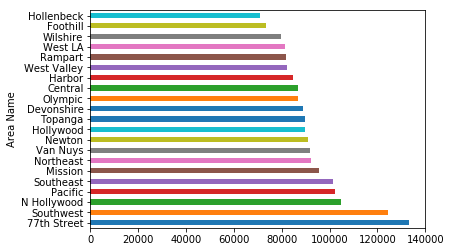

In [66]:
#Finding the area in Los Angeles with highest Crime rate.
la_crime_data_merge["Area Name"].groupby(la_crime_data_merge["Area Name"]).count().sort_values(ascending=False).plot(kind="barh")
plt.show()